####Opening BLAST program

In [1]:
!/Applications/ncbi-blast-2.5.0+/bin/blastp

BLAST query/options error: Either a BLAST database or subject sequence(s) must be specified
Please refer to the BLAST+ user manual.


####Viewing geoduck data
Steven & Brent [sampled geoduck in 2015](http://onsnetwork.org/halfshell/2015/08/11/big-day-big-clam/); this is me getting a glimpse of the raw data of said _p. generosa_ genome; BGI did the sequencing, and the files are [here](http://owl.fish.washington.edu/P_generosa_genome_assemblies_BGI/20160512/). 

In [4]:
! curl http://owl.fish.washington.edu/P_generosa_genome_assemblies_BGI/20160512/Panopea_generosa.scafSeq \
| head 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0>scaffold1 26.6
ACTAACAGACGATCATTAAATACAGTCATACAGAGCAAATGAATTAAGCAATAACCTTGTCTTTAAAGGCCACTTTTGCTCATTCCCTtgtcttgctgct
taaaacaagcttgactgtagatgtatccttaaaggctctcacaaagcattataaccgttatatcaattcattctatgatgctttaGCCCTTTACTCCATA
CATACGTGTTTTCCCGCACCAATCACAGAAtgcctttagaaactgttttccactctgtcagttaatataaacataagttacccaataattcaaaagccat
ctatattagaggtgtccaaaggcgtctctattaggtgtccaaaggcgtcgatatgaagtaaagggttaaatcaaTTTTTTGTAACCCCATCTGTTAATAT
ACATATATCTAGCTGATGTAATTTACTATGACCTTAAAATGATTTTCGTAAACTCAGTAAAGCTCATTTTAACAAGTTTGCAAAATATATATTATGCAAG
GCTGTGTCGGGCATTATATCATTTTTTGCCAATGAGTTGAATAAATTTATCATTGACTTTAAAAAGGTTTCCATCTATCTTAGAAATAGATATGACGGAC
ACTATGGTTTTACCATGACAAGTCAACaaatcgttatcatgtaccattaaatctgatactatattggttttccaggaaattgttttaattccatggcact
cgtaaatattCACTTGTTTTCTGATGTAACTTGTTTTTGTT

#####Prepping directory folders

In [1]:
pwd

'/Users/shlaura3/Documents/SAFS/FISH_546_Bioinformatics/546-Bioinformatics/2016-10_Geo-Ann-Project/Jupyter'

In [2]:
cd ..

/Users/shlaura3/Documents/SAFS/FISH_546_Bioinformatics/546-Bioinformatics/2016-10_Geo-Ann-Project


In [3]:
ls

Jupyter/


In [6]:
mkdir data/ analyses/ scripts/

mkdir: data/: File exists


In [7]:
ls

Jupyter/  analyses/ data/     scripts/


In [8]:
cd data/

/Users/shlaura3/Documents/SAFS/FISH_546_Bioinformatics/546-Bioinformatics/2016-10_Geo-Ann-Project/data


####Downloading geoduck genome file into local directory

In [10]:
!wget http://owl.fish.washington.edu/P_generosa_genome_assemblies_BGI/20160512/Panopea_generosa.scafSeq

/bin/sh: wget: command not found


_**Interesting note: the command `wget` is not installed on Macs**_

In [15]:
!curl -O http://owl.fish.washington.edu/P_generosa_genome_assemblies_BGI/20160512/Panopea_generosa.scafSeq.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  350M  100  350M    0     0   898k      0  0:06:40  0:06:40 --:--:--  909k


**Notes:**  
* Remember to use `!` before all commands (except for `cd` `pwd` `ls` etc.?)  
* -o (lowercase o) the result will be saved in the filename provided in the command line  
* -O (uppercase O) the filename in the URL will be taken and it will be used as the filename to store the result
* Helpful `curl` tips: http://www.thegeekstuff.com/2012/04/curl-examples/

In [32]:
ls

Panopea_generosa.scafSeq      Panopea_generosa.scafSeq.zip


In [48]:
!head Panopea_generosa.scafSeq

>scaffold1 26.6
ACTAACAGACGATCATTAAATACAGTCATACAGAGCAAATGAATTAAGCAATAACCTTGTCTTTAAAGGCCACTTTTGCTCATTCCCTtgtcttgctgct
taaaacaagcttgactgtagatgtatccttaaaggctctcacaaagcattataaccgttatatcaattcattctatgatgctttaGCCCTTTACTCCATA
CATACGTGTTTTCCCGCACCAATCACAGAAtgcctttagaaactgttttccactctgtcagttaatataaacataagttacccaataattcaaaagccat
ctatattagaggtgtccaaaggcgtctctattaggtgtccaaaggcgtcgatatgaagtaaagggttaaatcaaTTTTTTGTAACCCCATCTGTTAATAT
ACATATATCTAGCTGATGTAATTTACTATGACCTTAAAATGATTTTCGTAAACTCAGTAAAGCTCATTTTAACAAGTTTGCAAAATATATATTATGCAAG
GCTGTGTCGGGCATTATATCATTTTTTGCCAATGAGTTGAATAAATTTATCATTGACTTTAAAAAGGTTTCCATCTATCTTAGAAATAGATATGACGGAC
ACTATGGTTTTACCATGACAAGTCAACaaatcgttatcatgtaccattaaatctgatactatattggttttccaggaaattgttttaattccatggcact
cgtaaatattCACTTGTTTTCTGATGTAACTTGTTTTTGTTGTTTTTTCAGCCTGAATATAGATAACTATAACNGTTATCATGTACCATTAAATCTGATA
CTATATTGGTTTTCCAGGAAATTGTTTTAATTCCATGGCACTCGTAAatattcacttgttttctgatgtaacttgtttttgttgttttttcagcctgaat


In [49]:
!tail Panopea_generosa.scafSeq

GAGGACAAAATTGAGATTGTTGTGGACGGGAAACAGGAAACATATGAAGACGAGTTCGCGGTCATTAAGGTTAAGGTTTCAGACTTGGACGAAATGAAAA
TACCTTATGAGTTAGTTTAACCGCGGTACGCCAATGTATGATATACTTATACCAGTAAATGATTAGGAGGAATATTAATGAGCGAGAAAGTAGAATTGAT
TGTTGTTGATATGGTTGACGAGGAAATTAGTACTAAGTTCCAATTGTGTCCTGAAGACTACTCGAAAGTGTATACACTGCAGTTGTTCAAACAGGACTAT
AAAAAGGACACCAAAGAATGGGTCAGTGATGCGGAAACCACCAAACAATACGATGCGGATATGAAAGAGTTGGGTAACCCTAGCGTGGGTGATAAGGTCA
ATGTGTTCGTTTCAAACAACGGCAAAGCGTATTTGACTGAAAAAACATTCGTGGAAACGGTGAAACCTAGCGGGAAAGATGCGAACAAATTGTTCACAAA
TTGCGAAATTGAATCGTTCCATGATTCGCCAAAAGGGCGACGCGTGATTGTCAAGTATAAAAAGAATTTTTACGAGTTTAGTTTCAATTATTCCGTTTGG
ATTCCGTCAATTGAGAAGTACGTTCCAAATGATGCCAAAATGGAAAAGGCAAAAGTGCGATTCAACGATATTTTTGAACATTCGTTGATTACGTGGGAAA
ACGCACTAGAAACGGACGCGGATGGTGTTAGCATCCATAAGGGTGTTAAAATGAACTGCTTGGTTCGCAAAAACGAATTGGACGCAACTGGTCAAACAGG
TTGGTTGGAACCGTTGAAAATTGACGAACCAGATGTTGACGAAGACGACCTTCCGTTCTAAAAATAGTTACAAAAAAGTGTAAGTTTAGGCTTGCACTTT
TTATTTTACCGTGGTAAGATATACTCAACAAGTTGAGTGA


**Unsure how to navigate in the `less` program**

In [50]:
!less Panopea_generosa.scafSeq

>scaffold1 26.6
ACTAACAGACGATCATTAAATACAGTCATACAGAGCAAATGAATTAAGCAATAACCTTGTCTTTAAAGGCCACTTTTGCT CATTCCCTtgtcttgctgct
taaaacaagcttgactgtagatgtatccttaaaggctctcacaaagcattataaccgttatatcaattcattctatgatg ctttaGCCCTTTACTCCATA
CATACGTGTTTTCCCGCACCAATCACAGAAtgcctttagaaactgttttccactctgtcagttaatataaacataagtta cccaataattcaaaagccat
ctatattagaggtgtccaaaggcgtctctattaggtgtccaaaggcgtcgatatgaagtaaagggttaaatcaaTTTTTT GTAACCCCATCTGTTAATAT
ACATATATCTAGCTGATGTAATTTACTATGACCTTAAAATGATTTTCGTAAACTCAGTAAAGCTCATTTTAACAAGTTTG CAAAATATATATTATGCAAG
GCTGTGTCGGGCATTATATCATTTTTTGCCAATGAGTTGAATAAATTTATCATTGACTTTAAAAAGGTTTCCATCTATCT TAGAAATAGATATGACGGAC
ACTATGGTTTTACCATGACAAGTCAACaaatcgttatcatgtaccattaaatctgatactatattggttttccaggaaat tgttttaattccatggcact
cgtaaatattCACTTGTTTTCTGATGTAACTTGTTTTTGTTGTTTTTTCAGCCTGAATATAGATAACTATAACNGTTATC ATGTACCATTAAATCTGATA
CTATATTGGTTTTCCAGGAAATTGTTTTAATTCCATGGCACTCGTAAatattcacttgttttctgatgtaacttgttttt gttgttttttcagcctgaat
atagataactataacATGTTACTAGGAATGGGGTTCCCTAAGGGAGCTTCAGAAGAG

**Removing first row (metadata), viewing only first 5 rows of sequences**

In [59]:
!tail -n +2 Panopea_generosa.scafSeq | head -n 5

ACTAACAGACGATCATTAAATACAGTCATACAGAGCAAATGAATTAAGCAATAACCTTGTCTTTAAAGGCCACTTTTGCTCATTCCCTtgtcttgctgct
taaaacaagcttgactgtagatgtatccttaaaggctctcacaaagcattataaccgttatatcaattcattctatgatgctttaGCCCTTTACTCCATA
CATACGTGTTTTCCCGCACCAATCACAGAAtgcctttagaaactgttttccactctgtcagttaatataaacataagttacccaataattcaaaagccat
ctatattagaggtgtccaaaggcgtctctattaggtgtccaaaggcgtcgatatgaagtaaagggttaaatcaaTTTTTTGTAACCCCATCTGTTAATAT
ACATATATCTAGCTGATGTAATTTACTATGACCTTAAAATGATTTTCGTAAACTCAGTAAAGCTCATTTTAACAAGTTTGCAAAATATATATTATGCAAG
tail: stdout: Broken pipe


**Experimenting with `grep` and color coding**

In [66]:
!tail -n +2 Panopea_generosa.scafSeq | head -n 5 \
| grep -C2 "AAATACA" --color=auto

ACTAACAGACGATCATTAAATACAGTCATACAGAGCAAATGAATTAAGCAATAACCTTGTCTTTAAAGGCCACTTTTGCTCATTCCCTtgtcttgctgct
taaaacaagcttgactgtagatgtatccttaaaggctctcacaaagcattataaccgttatatcaattcattctatgatgctttaGCCCTTTACTCCATA
CATACGTGTTTTCCCGCACCAATCACAGAAtgcctttagaaactgttttccactctgtcagttaatataaacataagttacccaataattcaaaagccat
tail: stdout: Broken pipe


In [67]:
!file Panopea_generosa.scafSeq

Panopea_generosa.scafSeq: ASCII text


**Trying to really manipulate the genome data in order to Blast in comparison to transcriptome data. First let's see the first 20 rows of the data:**

In [1]:
pwd

'/Users/shlaura3/Documents/SAFS/FISH_546_Bioinformatics/546-Bioinformatics/2016-10_Geo-Ann-Project/Jupyter'

In [4]:
cd ..

/Users/shlaura3/Documents/SAFS/FISH_546_Bioinformatics/546-Bioinformatics/2016-10_Geo-Ann-Project


In [5]:
cd data

/Users/shlaura3/Documents/SAFS/FISH_546_Bioinformatics/546-Bioinformatics/2016-10_Geo-Ann-Project/data


In [6]:
ls

Panopea_generosa.scafSeq      Panopea_generosa.scafSeq.zip


In [19]:
!head -n 60 Panopea_generosa.scafSeq

>scaffold1 26.6
ACTAACAGACGATCATTAAATACAGTCATACAGAGCAAATGAATTAAGCAATAACCTTGTCTTTAAAGGCCACTTTTGCTCATTCCCTtgtcttgctgct
taaaacaagcttgactgtagatgtatccttaaaggctctcacaaagcattataaccgttatatcaattcattctatgatgctttaGCCCTTTACTCCATA
CATACGTGTTTTCCCGCACCAATCACAGAAtgcctttagaaactgttttccactctgtcagttaatataaacataagttacccaataattcaaaagccat
ctatattagaggtgtccaaaggcgtctctattaggtgtccaaaggcgtcgatatgaagtaaagggttaaatcaaTTTTTTGTAACCCCATCTGTTAATAT
ACATATATCTAGCTGATGTAATTTACTATGACCTTAAAATGATTTTCGTAAACTCAGTAAAGCTCATTTTAACAAGTTTGCAAAATATATATTATGCAAG
GCTGTGTCGGGCATTATATCATTTTTTGCCAATGAGTTGAATAAATTTATCATTGACTTTAAAAAGGTTTCCATCTATCTTAGAAATAGATATGACGGAC
ACTATGGTTTTACCATGACAAGTCAACaaatcgttatcatgtaccattaaatctgatactatattggttttccaggaaattgttttaattccatggcact
cgtaaatattCACTTGTTTTCTGATGTAACTTGTTTTTGTTGTTTTTTCAGCCTGAATATAGATAACTATAACNGTTATCATGTACCATTAAATCTGATA
CTATATTGGTTTTCCAGGAAATTGTTTTAATTCCATGGCACTCGTAAatattcacttgttttctgatgtaacttgtttttgttgttttttcagcctgaat
atagataactataacATGTTACTAGGAATGGGGTTCCCTAAGGGAGCTTCAGAAGAGGCACTCAGACAGGGAAAC

**So, I take it the scaffolds are very long. I'm curious what "26.6" means -> is this the scaffold #? I'll try to see how many scaffolds there are...**

In [9]:
! grep -c "^>" Panopea_generosa.scafSeq

1296135


**Ok, there are nearly 1.3 million scaffolds. Steven suggested paring this data down to only very large scaffolds, such as on those >70k. This script was borrowed from [Steven's notebbok](https://sr320.github.io/student-fish546-2016/data-description/)**

In [10]:
!awk '!/^>/ { next } { getline seq } length(seq) >= 70000 { print $0 "\n" seq }' \
../data/Panopea_generosa.scafSeq > ../data/Panopea_generosa_scaff-70k.scafSeq

In [11]:
ls

Panopea_generosa.scafSeq            Panopea_generosa_scaff-70k.scafSeq
Panopea_generosa.scafSeq.zip


In [16]:
! wc Panopea_generosa_scaff-70k.scafSeq

       0       0       0 Panopea_generosa_scaff-70k.scafSeq


**Hmm... the new file doesn't contain anything; turns out this is because there are "hard line-breaks" within scaffolds, so the search isn't finding any super long contigs. Now using a script (from Steven) to remove these line breaks:**

In [20]:
!awk '!/^>/ { printf "%s", $0; n = "\n" } /^>/ { print n $0; n = "" } END { printf "%s", n }' \
../data/Panopea_generosa.scafSeq > ../data/Panopea_generosa_No-Line-Breaks.scafSeq

In [22]:
!head -n 20 ../data/Panopea_generosa_No-Line-Breaks.scafSeq

>scaffold1 26.6
ACTAACAGACGATCATTAAATACAGTCATACAGAGCAAATGAATTAAGCAATAACCTTGTCTTTAAAGGCCACTTTTGCTCATTCCCTtgtcttgctgcttaaaacaagcttgactgtagatgtatccttaaaggctctcacaaagcattataaccgttatatcaattcattctatgatgctttaGCCCTTTACTCCATACATACGTGTTTTCCCGCACCAATCACAGAAtgcctttagaaactgttttccactctgtcagttaatataaacataagttacccaataattcaaaagccatctatattagaggtgtccaaaggcgtctctattaggtgtccaaaggcgtcgatatgaagtaaagggttaaatcaaTTTTTTGTAACCCCATCTGTTAATATACATATATCTAGCTGATGTAATTTACTATGACCTTAAAATGATTTTCGTAAACTCAGTAAAGCTCATTTTAACAAGTTTGCAAAATATATATTATGCAAGGCTGTGTCGGGCATTATATCATTTTTTGCCAATGAGTTGAATAAATTTATCATTGACTTTAAAAAGGTTTCCATCTATCTTAGAAATAGATATGACGGACACTATGGTTTTACCATGACAAGTCAACaaatcgttatcatgtaccattaaatctgatactatattggttttccaggaaattgttttaattccatggcactcgtaaatattCACTTGTTTTCTGATGTAACTTGTTTTTGTTGTTTTTTCAGCCTGAATATAGATAACTATAACNGTTATCATGTACCATTAAATCTGATACTATATTGGTTTTCCAGGAAATTGTTTTAATTCCATGGCACTCGTAAatattcacttgttttctgatgtaacttgtttttgttgttttttcagcctgaatatagataactataacATGTTACTAGGAATGGGGTTCCCTAAGGGAGCTTCAGAAGAGGCACTCAGACAGGGAAACAATGATGTC

**Looks like ALL line breaks have gone away now, b/c when I ask for the first 20 lines it produces many more. I'll try the >70k script again, see what happens**

In [23]:
!awk '!/^>/ { next } { getline seq } length(seq) >= 70000 { print $0 "\n" seq }' \
../data/Panopea_generosa_No-Line-Breaks.scafSeq > ../data/Panopea_generosa_scaff-70k.scafSeq

In [25]:
! grep -c "^>" ../data/Panopea_generosa_scaff-70k.scafSeq

20


**Great! I've subselected the largest 20 scaffolds (from ~1.3M). Now I'm downloading a script that Steven used to get a summary/counts of the sequence data**

In [1]:
pwd

'/Users/shlaura3/Documents/SAFS/FISH_546_Bioinformatics/546-Bioinformatics/2016-10_Geo-Ann-Project/Jupyter-Notebooks'

In [2]:
cd ../scripts

/Users/shlaura3/Documents/SAFS/FISH_546_Bioinformatics/546-Bioinformatics/2016-10_Geo-Ann-Project/scripts


In [3]:
pwd

'/Users/shlaura3/Documents/SAFS/FISH_546_Bioinformatics/546-Bioinformatics/2016-10_Geo-Ann-Project/scripts'

In [4]:
!curl -O https://github.com/sr320/student-fish546-2016/blob/master/scripts/count_fasta.pl

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63555    0 63555    0     0   104k      0 --:--:-- --:--:-- --:--:--  106k


**Applying summary/count script to my sequence data:**

In [6]:
ls

count_fasta.pl


In [5]:
!perl ../scripts/count_fasta.pl \
-i 10000 \
../data/Panopea_generosa_scaff-70k.scafSeq

Bareword found where operator expected at ../scripts/count_fasta.pl line 6, near ""en" class"
	(Missing operator before class?)
Bareword found where operator expected at ../scripts/count_fasta.pl line 22, near "<title>student"
	(Missing operator before student?)
Can't modify numeric lt (<) in scalar assignment at ../scripts/count_fasta.pl line 6, near ""en" class"
syntax error at ../scripts/count_fasta.pl line 6, near ""en" class"
Unrecognized character \xC2; marked by <-- HERE after at master <-- HERE near column 58 at ../scripts/count_fasta.pl line 22.


**I see now that this script is written in perl, so it won't work using bash. I'll press forward without doing the sanity check now, and will circle back later should I figure out the bash script.** 

**Now I'm going to blast the _p. generosa_ transcriptome Steven has been working on against the _p. generosa_ genome. I'm using the blastn program because it compares nucleotide-nucleotide.**

In [7]:
!/Applications/ncbi-blast-2.5.0+/bin/blastn

BLAST query/options error: Either a BLAST database or subject sequence(s) must be specified
Please refer to the BLAST+ user manual.


**Downloading _p. generosa_ transcriptome**

In [8]:
cd ../data

/Users/shlaura3/Documents/SAFS/FISH_546_Bioinformatics/546-Bioinformatics/2016-10_Geo-Ann-Project/data


In [9]:
!curl -O https://github.com/sr320/paper-pano-go/raw/master/data-results/Geoduck-transcriptome-v3.fa.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   171  100   171    0     0    313      0 --:--:-- --:--:-- --:--:--   316


_**unzipped the file by using the gui directory**_

In [15]:
ls

Geoduck-transcriptome-v3.fa.zip
Geoduck-transcriptome-v3.fa.zip.cpgz
Panopea_generosa.scafSeq
Panopea_generosa.scafSeq.zip
Panopea_generosa_No-Line-Breaks.scafSeq
Panopea_generosa_scaff-70k.scafSeq


**Building a databse out of the _p. generosa_ genome file, since I'll be blasting the transcriptome against the genome**

In [16]:
!/Applications/ncbi-blast-2.5.0+/bin/makeblastdb \
-in ../data/Panopea_generosa_scaff-70k.scafSeq \
-dbtype nucl \
-out ../data/Panopea_generosa_scaff-70k_db



Building a new DB, current time: 10/20/2016 11:29:24
New DB name:   /Users/shlaura3/Documents/SAFS/FISH_546_Bioinformatics/546-Bioinformatics/2016-10_Geo-Ann-Project/data/Panopea_generosa_scaff-70k_db
New DB title:  ../data/Panopea_generosa_scaff-70k.scafSeq
Sequence type: Nucleotide
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 20 sequences in 0.0768011 seconds.


In [17]:
ls

Geoduck-transcriptome-v3.fa.zip
Geoduck-transcriptome-v3.fa.zip.cpgz
Panopea_generosa.scafSeq
Panopea_generosa.scafSeq.zip
Panopea_generosa_No-Line-Breaks.scafSeq
Panopea_generosa_scaff-70k.scafSeq
Panopea_generosa_scaff-70k_db.nhr
Panopea_generosa_scaff-70k_db.nin
Panopea_generosa_scaff-70k_db.nsq


In [20]:
!/Applications/ncbi-blast-2.5.0+/bin/blastn \
-query ../data/Geoduck-transcriptome-v3.fa.zip.cpgz \
-db ../data/Panopea_generosa_scaff-70k_db \
-outfmt 6  \
-out ../analyses/pgenerosa-transcrv3-blastn-scaff70k-01.tab


Error: NCBI C++ Exception:
    T0 "/Users/coremake/release_build/build/PrepareRelease_IntelMAC-Clang36_JSID_01_40204_130.14.22.10_9008__PrepareRelease_IntelMAC-Clang36_1473441060/c++/compilers/unix/../../src/objtools/readers/fasta.cpp", line 2178: Error: ncbi::objects::CFastaReader::PostWarning() - CFastaReader: Near line 1, there's a line that doesn't look like plausible data, but it's not marked as defline or comment. (m_Pos = 1)



In [24]:
!head -n 100 Geoduck-transcriptome-v3.fa.zip.cpgz

�      �P�J�@���{�̴3݂�"��ŋǴͶ�mgȤ�~��
ck%T��՗������m��wVo�������!I���� ����   

**Something is not right with the transcriptome file. Turns out while unzipping it created the .cpgz zip file (interesting read on .cpgz)[http://osxdaily.com/2013/02/13/open-zip-cpgz-file/]. I'm going to download the .zip file again, then try to unzip at command line**

In [25]:
ls

Geoduck-transcriptome-v3.fa.zip
Geoduck-transcriptome-v3.fa.zip.cpgz
Panopea_generosa.scafSeq
Panopea_generosa.scafSeq.zip
Panopea_generosa_No-Line-Breaks.scafSeq
Panopea_generosa_scaff-70k.scafSeq
Panopea_generosa_scaff-70k_db.nhr
Panopea_generosa_scaff-70k_db.nin
Panopea_generosa_scaff-70k_db.nsq


In [28]:
!rm Geoduck-transcriptome-v3.fa.zip

rm: Geoduck-transcriptome-v3.fa.zip: No such file or directory


In [30]:
ls

Panopea_generosa.scafSeq
Panopea_generosa.scafSeq.zip
Panopea_generosa_No-Line-Breaks.scafSeq
Panopea_generosa_scaff-70k.scafSeq
Panopea_generosa_scaff-70k_db.nhr
Panopea_generosa_scaff-70k_db.nin
Panopea_generosa_scaff-70k_db.nsq


In [31]:
!curl -O https://github.com/sr320/paper-pano-go/raw/master/data-results/Geoduck-transcriptome-v3.fa.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   171  100   171    0     0    297      0 --:--:-- --:--:-- --:--:--   304


In [4]:
cd ../data

/Users/shlaura3/Documents/SAFS/FISH_546_Bioinformatics/546-Bioinformatics/2016-10_Geo-Ann-Project/data


In [5]:
ls

Geoduck-transcriptome-v3.fa.zip
Panopea_generosa.scafSeq
Panopea_generosa.scafSeq.zip
Panopea_generosa_No-Line-Breaks.scafSeq
Panopea_generosa_scaff-70k.scafSeq
Panopea_generosa_scaff-70k_db.nhr
Panopea_generosa_scaff-70k_db.nin
Panopea_generosa_scaff-70k_db.nsq


In [6]:
!unzip Geoduck-transcriptome-v3.fa.zip

Archive:  Geoduck-transcriptome-v3.fa.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of Geoduck-transcriptome-v3.fa.zip or
        Geoduck-transcriptome-v3.fa.zip.zip, and cannot find Geoduck-transcriptome-v3.fa.zip.ZIP, period.


**It's clear that the file downloaded via `curl` is corrupted. I deleted it, and will download again via GUI, then `unzip` and `blast` as previously attempted**

In [3]:
cd ../data

/Users/shlaura3/Documents/SAFS/FISH_546_Bioinformatics/546-Bioinformatics/2016-10_Geo-Ann-Project/data


In [5]:
ls

Geoduck-transcriptome-v3.fa.zip
Panopea_generosa.scafSeq
Panopea_generosa.scafSeq.zip
Panopea_generosa_No-Line-Breaks.scafSeq
Panopea_generosa_scaff-70k.scafSeq
Panopea_generosa_scaff-70k_db.nhr
Panopea_generosa_scaff-70k_db.nin
Panopea_generosa_scaff-70k_db.nsq


In [6]:
!unzip Geoduck-transcriptome-v3.fa.zip

Archive:  Geoduck-transcriptome-v3.fa.zip
  inflating: Geoduck-transcriptome-v3.fa  


In [7]:
!/Applications/ncbi-blast-2.5.0+/bin/blastn

BLAST query/options error: Either a BLAST database or subject sequence(s) must be specified
Please refer to the BLAST+ user manual.


In [8]:
!/Applications/ncbi-blast-2.5.0+/bin/blastn \
-query ../data/Geoduck-transcriptome-v3.fa \
-db ../data/Panopea_generosa_scaff-70k_db \
-outfmt 6  \
-out ../analyses/pgenerosa-transcrv3-blastn-scaff70k-01.tab

In [14]:
cd ../analyses

/Users/shlaura3/Documents/SAFS/FISH_546_Bioinformatics/546-Bioinformatics/2016-10_Geo-Ann-Project/analyses


In [15]:
ls

pgenerosa-transcrv3-blastn-scaff70k-01.tab


In [16]:
!head pgenerosa-transcrv3-blastn-scaff70k-01.tab

comp100323_c0_seq1	scaffold10970	95.161	62	3	0	3	64	58201	58262	5.51e-22	99.0
comp100333_c1_seq1	scaffold10970	88.800	125	10	3	1	121	99916	100040	2.05e-37	150
comp100468_c0_seq1	scaffold9504	100.000	28	0	0	206	233	59077	59104	5.04e-08	52.8
comp101573_c0_seq1	scaffold32578	98.341	422	6	1	1	422	55507	55927	0.0	739
comp101587_c0_seq1	scaffold30278	100.000	29	0	0	275	303	60566	60538	1.86e-08	54.7
comp102059_c0_seq1	scaffold71773	81.875	160	23	5	1	158	55978	55823	2.38e-31	130
comp102699_c0_seq1	scaffold15463	86.765	68	9	0	91	158	6270	6203	2.79e-15	76.8
comp103000_c0_seq1	scaffold59644	98.305	118	2	0	105	222	2781	2664	9.63e-55	207
comp103462_c0_seq1	scaffold26337	83.784	111	6	2	156	254	134703	134813	1.03e-20	95.3
comp103462_c0_seq2	scaffold26337	83.784	111	6	2	185	283	134703	134813	1.14e-20	95.3


In [18]:
! grep -c "^comp" pgenerosa-transcrv3-blastn-scaff70k-01.tab

3366


**If blasted correctly, there are 3,366 matches**

### Non-Sequiter - Quiz problem: 
"Identify a gene in your "project" taxa that is similar to a gene differentially expressed in sea stars that have wasting disease. Show your work in R."
**I will use Steven's Jupyter notebook [entry](https://github.com/sr320/eimd-sswd/blob/master/eimd_analysis.ipynb) as the blueprint for the first part of this exercise**

In [1]:
pwd

'/Users/shlaura3/Documents/SAFS/FISH_546_Bioinformatics/546-Bioinformatics/2016-10_Geo-Ann-Project/Jupyter-Notebooks'

In [2]:
cd ../data

/Users/shlaura3/Documents/SAFS/FISH_546_Bioinformatics/546-Bioinformatics/2016-10_Geo-Ann-Project/data


In [12]:
#Tried this a couple times due to indirect file link copied from GitHub
!curl -O https://raw.githubusercontent.com/sr320/eimd-sswd/master/data/Phel_transcriptome.fasta

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 39.4M  100 39.4M    0     0   859k      0  0:00:46  0:00:46 --:--:--  908k


In [13]:
ls

Geoduck-transcriptome-v3.fa
Geoduck-transcriptome-v3.fa.zip
Panopea_generosa.scafSeq
Panopea_generosa.scafSeq.zip
Panopea_generosa_No-Line-Breaks.scafSeq
Panopea_generosa_scaff-70k.scafSeq
Panopea_generosa_scaff-70k_db.nhr
Panopea_generosa_scaff-70k_db.nin
Panopea_generosa_scaff-70k_db.nsq
Phel_transcriptome.fasta


In [14]:
!head Phel_transcriptome.fasta

>Phel_contig_1
CAAATATATGAACGGTTGATTGTCAACGATTAGTACATGTTTTCATTGTTCCCCACGCCCGCCCCCCCCCACTCAAACATTTAAAGTGTGAAATATTATTTATCCACAAATTTCCTTAAACCTGCAAACTTGTCTGCTGTCTCTTATTGGAAGTTATGAAAAAGAACAACGGGTTTTCTTTAAAGGGTCTGCGTGCGATTTTCAACCTTTTGAGTAATAGCAGTTATTTTGATAACCGATTTTTTTCAAAGCTCAACAGCTTTTTAAAATAAGGAATCCTATAATGGCCAAACGAATACTATAAAAATAAGGGTTCTCTTAATTGTATAAAACGTATAATTTTATCAATTTTGGGACCGTGTAATTTTTTAAAGACCACAAGAATGTTACATACAACAAATAGACGAAACTCGTAGCTTTGGAAACTACGTCATGGGCGTTTGGTCAAAAGCTGGAGAGAAAGAGAGGTGGGGTGCCAGACTTAAGTAGTCACGTGATCTGACCAACGCACATCGGAAGCTCGATCGGATGAAATCTTCTCTATCGTTCTTGCGTCTATACGTGCTACGAAGAGCTGACAGAAGTTTGGACTTGTTTACTTCTTGCACCTGTTGATGGAACGGCCACGGACCTTGTCGCACGCACACCTGGAGCCAGTGCTCGGATCGACGCAACGGATGTACTGTCTTCCCCTTCCGCGTTTCTCAAGTAGGTACTCAAAGTCGTCCGCGTCGAAGTTGGCCTCGGCGTCCCTCTTCTCCAGCTCCTCCATGTCCTCCTCTGTGTAGTACGGGGTGACGAGCACCACCAGGGCGGCCACAATGGCCAGTGCTAGAAGACACTTCGTATTCATTCTGCTGGTGGTTGGATGTGCGCAAACAAGACAGGAGAGACTTATTAGAATC
>Phel_contig_10
TGTACCCCTGGGTGGACAGAAGCAATTATAGTAAAGTATCTTGCTCAAGGACACAAGTGTCAT

In [17]:
cd ../scripts

/Users/shlaura3/Documents/SAFS/FISH_546_Bioinformatics/546-Bioinformatics/2016-10_Geo-Ann-Project/scripts


In [22]:
# downloading count script from Steven's site; used the "raw" view option in GitHub
!curl -O https://raw.githubusercontent.com/sr320/eimd-sswd/master/scripts/count_fasta.pl

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3224  100  3224    0     0   3509      0 --:--:-- --:--:-- --:--:-- 21637


In [24]:
!head count_fasta.pl


#!/usr/bin/perl -w
# count_fasta.pl
# AUTHOR: Joseph Fass (modified from script by Brad Sickler)
# LAST REVISED: November 2010
# 
# The Bioinformatics Core at UC Davis Genome Center
# http://bioinformatics.ucdavis.edu
# Copyright (c) 2009 The Regents of University of California, Davis Campus.
# All rights reserved.


In [26]:
# Using perl counting script to inspect transcriptome
!perl ../scripts/count_fasta.pl -i 1000 ../data/Phel_transcriptome.fasta


0:999 	15505
1000:1999 	8559
2000:2999 	3003
3000:3999 	1240
4000:4999 	580
5000:5999 	312
6000:6999 	129
7000:7999 	72
8000:8999 	31
9000:9999 	19
10000:10999 	9
11000:11999 	7
12000:12999 	2
13000:13999 	4
14000:14999 	3
15000:15999 	0
16000:16999 	1

Total length of sequence:	40747496 bp
Total number of sequences:	29476
N25 stats:			25% of total sequence length is contained in the 2260 sequences >= 3085 bp
N50 stats:			50% of total sequence length is contained in the 6715 sequences >= 1757 bp
N75 stats:			75% of total sequence length is contained in the 14612 sequences >= 959 bp
Total GC count:			16459121 bp
GC %:				40.39 %



**Hey, it worked!** I'm realizing now that I've gone back too far in the workflow shown on Steven's Jupyter notebook. I will skip ahead and pick up at the **Differential Analysis** section.

In [29]:
cd ../data

/Users/shlaura3/Documents/SAFS/FISH_546_Bioinformatics/546-Bioinformatics/2016-10_Geo-Ann-Project/data


In [30]:
!curl -O https://raw.githubusercontent.com/sr320/eimd-sswd/master/data/Phel_countdata.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  997k  100  997k    0     0   570k      0  0:00:01  0:00:01 --:--:--  642k


**Before opening R to perform DESeq2 analysis I need to install rpy2 on my computer.**

In [42]:
!pip install rpy2

    100% |████████████████████████████████| 194kB 629kB/s 
  Running setup.py bdist_wheel for rpy2 ... - \ | / - \ | / - \ | / - \ done
  Stored in directory: /Users/shlaura3/Library/Caches/pip/wheels/e8/08/4c/8a2bec94e55df1a2e175d9d352b30770e554fb8378f76a8cde
Successfully built rpy2


In [43]:
%load_ext rpy2.ipython

After opening the rpy2 extension, I opened R and the DESeq2 library

In [46]:
%%R 
library(DESeq2)

In [51]:
cd ../data

/Users/shlaura3/Documents/SAFS/FISH_546_Bioinformatics/546-Bioinformatics/2016-10_Geo-Ann-Project/data


In [52]:
ls

Geoduck-transcriptome-v3.fa
Geoduck-transcriptome-v3.fa.zip
Panopea_generosa.scafSeq
Panopea_generosa.scafSeq.zip
Panopea_generosa_No-Line-Breaks.scafSeq
Panopea_generosa_scaff-70k.scafSeq
Panopea_generosa_scaff-70k_db.nhr
Panopea_generosa_scaff-70k_db.nin
Panopea_generosa_scaff-70k_db.nsq
Phel_countdata.txt
Phel_transcriptome.fasta


In [53]:
%%R
data <- read.table("../data/Phel_countdata.txt", header = T, sep = "\t")

In [54]:
%%R
rownames(data) <- data$Feature
data <- data[,-1]

Building objects with correct column names

In [59]:
%%R
deseq2.colData <- data.frame(condition=factor(c(rep("Treated", 3), rep("Control", 3))), 
                             type=factor(rep("single-read", 6)))

In [60]:
%%R
rownames(deseq2.colData) <- colnames(data)

In [61]:
%%R
deseq2.dds <- DESeqDataSetFromMatrix(countData = data,
                                     colData = deseq2.colData, 
                                     design = ~ condition)

Running DESeq2 analysis! For some reason the code doesn't work if I run everything on the same line, so I broke it up.

In [62]:
%%R
deseq2.dds <- DESeq(deseq2.dds)

In [63]:
%%R
deseq2.res <- results(deseq2.dds)

In [64]:
%%R
deseq2.res <- deseq2.res[order(rownames(deseq2.res)), ]

In [65]:
%%R
head(deseq2.res)

log2 fold change (MAP): condition Treated vs Control 
Wald test p-value: condition Treated vs Control 
DataFrame with 6 rows and 6 columns
                    baseMean log2FoldChange     lfcSE        stat       pvalue
                   <numeric>      <numeric> <numeric>   <numeric>    <numeric>
Phel_contig_1      114.07829     1.69961840 1.0100369  1.68272906 9.242755e-02
Phel_contig_10    5492.70960     7.86315045 0.7971970  9.86349715 5.992508e-23
Phel_contig_100    786.08744     0.01617676 0.3333508  0.04852773 9.612957e-01
Phel_contig_1000  5406.89996     0.21199831 0.3564274  0.59478682 5.519860e-01
Phel_contig_10000   24.76992    -0.20247224 0.6508602 -0.31108406 7.557367e-01
Phel_contig_10001  136.22441     1.62245163 0.6023366  2.69359627 7.068573e-03
                          padj
                     <numeric>
Phel_contig_1     2.634828e-01
Phel_contig_10    3.337238e-20
Phel_contig_100   9.841732e-01
Phel_contig_1000  7.618283e-01
Phel_contig_10000 8.874021e-01
Phel_contig_

In [66]:
%%R
dim(deseq2.res[!is.na(deseq2.res$padj) & deseq2.res$padj <= 0.05, ])

[1] 3672    6


In [67]:
%%R
tmp <- deseq2.res

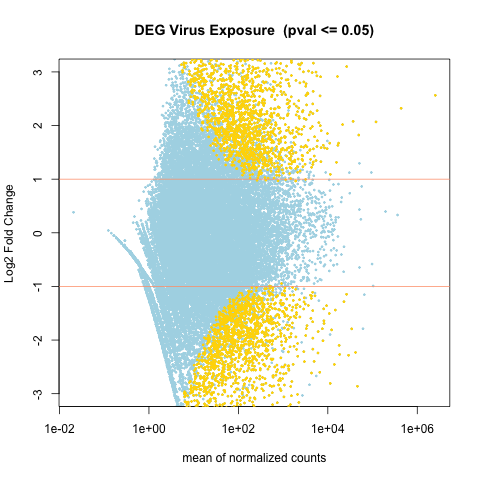

In [69]:
%%R
plot(tmp$baseMean, tmp$log2FoldChange, pch=20, cex=0.45, ylim=c(-3, 3), log="x", col="lightblue",
     main="DEG Virus Exposure  (pval <= 0.05)",
     xlab="mean of normalized counts",
     ylab="Log2 Fold Change")
tmp.sig <- deseq2.res[!is.na(deseq2.res$padj) & deseq2.res$padj <= 0.05, ]
points(tmp.sig$baseMean, tmp.sig$log2FoldChange, pch=20, cex=0.45, col="gold1")
abline(h=c(-1,1), col="lightsalmon")

In [70]:
%%R
write.table(tmp.sig, "../analyses/Phel_DEGlist.tab", row.names = T)

In [76]:
cd ../analyses

/Users/shlaura3/Documents/SAFS/FISH_546_Bioinformatics/546-Bioinformatics/2016-10_Geo-Ann-Project/analyses


In [77]:
ls

Phel_DEGlist.tab
Rplot.png
SeaStarDiffExp.R
pgenerosa-transcrv3-blastn-scaff70k-01.tab


In [78]:
!head ../analyses/Phel_DEGlist.tab

"baseMean" "log2FoldChange" "lfcSE" "stat" "pvalue" "padj"
"Phel_contig_10" 5492.70960072414 7.8631504540472 0.797197012058071 9.86349714701944 5.99250758527973e-23 3.33723781454912e-20
"Phel_contig_10001" 136.224412089297 1.62245162721989 0.602336604005459 2.69359626566076 0.00706857297426006 0.042701732485227
"Phel_contig_10005" 51.5511935035151 -2.82637595320869 0.992107639509522 -2.84886018477389 0.00438761574975669 0.0296180303057019
"Phel_contig_10010" 8.7342056518699 2.85688000414025 0.930855613493083 3.06909037527277 0.00214711627482055 0.0172713540500384
"Phel_contig_10013" 189.785994443343 -2.07211153983238 0.512307675759888 -4.04466229548267 5.23985994474503e-05 0.000879652465584291
"Phel_contig_10045" 50.2388038133868 3.42378417357307 0.806817297734616 4.24356813269421 2.19993538681764e-05 0.000428875262851799
"Phel_contig_1005" 3425.16142786886 -1.7310040313606 0.426139021400776 -4.06206412562397 4.86407105890346e-05 0.00083202943573067
"Phel_contig_10050" 281.308679616738

**Possible next steps: merge this Phel_DEGlist.tab file with the original genome file, obtaining the sequence of each contig (using R). Then, blast it against my _p. generosa_ genome file.** 

Back at it!
...
First step, manipulate the data files to appropriate formats using the free online tools on [Galaxy](https://usegalaxy.org/)

Step 1: upload data files to Galaxy.
Step 2: convert the Phel_transcriptome.fasta file from FASTA to Tabular as follows:

![Fasta to Tab on Galaxy](../images/2016-10-27_Galaxy-FASTA-to-Tab.png)

After inspecting the Phel_DEGlist.tab file is not tab delineated; use the Galaxy's `Text Manipuation - Convert` option: 

![converting spaces to tabs](../images/2016-10-27_Galaxy-spaces-to-tabs.png)

The contig names in column 1 in the Phel-DEGlist.tab file have " " around them, so use Galaxy's `Trim` function:

![Trimming strings](../images/2016-10-27_Trimming-strings.png)